<a href="https://colab.research.google.com/github/fajrulsantoso/Pembelajaran-Mesin_2025-2026/blob/main/UTS_Ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FAJRUL SANTOSO  ## TI_3H ABSEN_11 PRODI TEKNIK INFORMATIKA

## Clustering dan Approximate Nearest Neighbor (ANN)

## Heart Disease Dataset (UCI)

## Import & Persiapan Library

In [3]:
!pip install annoy


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Load Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
import pandas as pd

# Path menuju file heart.csv
path = '/content/drive/MyDrive/ML/heart.csv'

# Load dataset
df = pd.read_csv(path)

# Tampilkan 5 baris pertama
df.head()

# Tampilkan informasi dasar dataset
print("Ukuran dataset:", df.shape)
display(df.head())
df.info()

Ukuran dataset: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Penjelasan Singkat Dataset

"""
Dataset ini berisi data medis pasien terkait penyakit jantung dengan total
1.025 sampel dan 14 fitur. Setiap baris merepresentasikan satu pasien dengan
berbagai atribut kesehatan seperti usia, jenis kelamin, tekanan darah,
kolesterol, detak jantung, dan hasil pemeriksaan jantung lainnya.

Sebagian besar fitur bertipe numerik (int64 dan float64), terdiri dari
13 variabel input dan 1 variabel target (target) yang menunjukkan
ada atau tidaknya penyakit jantung (1 = ada penyakit, 0 = tidak ada).

Secara keseluruhan, dataset ini digunakan untuk menganalisis dan
mengelompokkan pasien berdasarkan kesamaan kondisi medis,
sehingga dapat membantu dalam memahami pola dan faktor risiko
penyakit jantung.
"""


# 3. Data Preprocessing

In [11]:

print("Jumlah Missing Values:")
print(df.isnull().sum())
df = df.fillna(df.mean())
df['CholAge'] = df['chol'] * df['age']
num_df = df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)

print("\n✅ Data berhasil diproses dan dinormalisasi.")
print("Jumlah fitur setelah penambahan:", num_df.shape[1])


Jumlah Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

✅ Data berhasil diproses dan dinormalisasi.
Jumlah fitur setelah penambahan: 15


# Penjelasan Tahap Data Preprocessing

"""
Langkah ini bertujuan untuk menyiapkan data sebelum digunakan dalam proses analisis atau pemodelan.

Beberapa langkah utama yang dilakukan:
1. Menangani nilai yang hilang (missing value) dengan menggantinya menggunakan nilai rata-rata (mean).
2. Membuat fitur baru bernama 'CholAge', yaitu hasil perkalian antara kadar kolesterol (chol) dan usia (age),
   agar model dapat mengenali pengaruh kombinasi kedua faktor tersebut.
3. Melakukan normalisasi (standarisasi) menggunakan StandardScaler,
   sehingga setiap fitur memiliki skala yang seimbang dan tidak ada yang mendominasi.

Hasilnya, data menjadi bersih, lengkap, serta siap digunakan untuk tahap pemodelan berikutnya.
"""


## 4. Clustering dengan KMeans & DBSCAN

In [12]:

kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
sil_kmeans = silhouette_score(X_scaled, labels_kmeans)
dbi_kmeans = davies_bouldin_score(X_scaled, labels_kmeans)
sil_dbscan = silhouette_score(X_scaled, labels_dbscan)
dbi_dbscan = davies_bouldin_score(X_scaled, labels_dbscan)

print("=== Evaluasi Clustering ===")
print(f"KMeans  → Silhouette: {sil_kmeans:.4f} | Davies–Bouldin: {dbi_kmeans:.4f}")
print(f"DBSCAN  → Silhouette: {sil_dbscan:.4f} | Davies–Bouldin: {dbi_dbscan:.4f}")


=== Evaluasi Clustering ===
KMeans  → Silhouette: 0.1468 | Davies–Bouldin: 2.2231
DBSCAN  → Silhouette: -0.1957 | Davies–Bouldin: 1.3457


# Penjelasan Tahap Evaluasi Clustering

"""
Pada tahap ini dilakukan evaluasi terhadap hasil clustering menggunakan dua algoritma, yaitu K-Means dan DBSCAN.
Evaluasi dilakukan dengan dua metrik utama:

1. Silhouette Score → Mengukur seberapa baik suatu data berada di dalam klusternya sendiri dibandingkan dengan kluster lain.
   Nilai berkisar antara -1 hingga 1, dan semakin tinggi nilainya maka semakin baik pemisahan antar kluster.

2. Davies–Bouldin Index (DBI) → Mengukur seberapa mirip antar kluster.
   Nilai yang lebih rendah menunjukkan hasil klustering yang lebih baik.

Hasil evaluasi menunjukkan:
- KMeans  → Silhouette: 0.1468 | DBI: 2.2231
- DBSCAN  → Silhouette: -0.1957 | DBI: 1.3457

Interpretasi:
Nilai Silhouette KMeans lebih tinggi, namun DBI DBSCAN lebih rendah.
Artinya, KMeans membentuk kluster yang lebih terpisah dengan baik,
sedangkan DBSCAN menghasilkan kluster yang lebih padat namun cenderung tumpang tindih.
Secara keseluruhan, KMeans memberikan struktur kluster yang lebih rapi pada dataset ini.
"""


## 5. Visualisasi Hasil Clustering

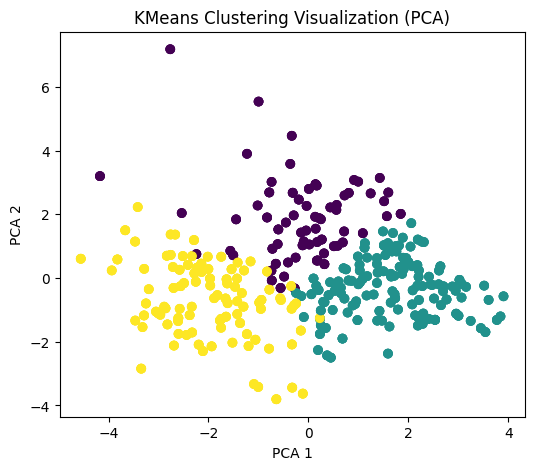

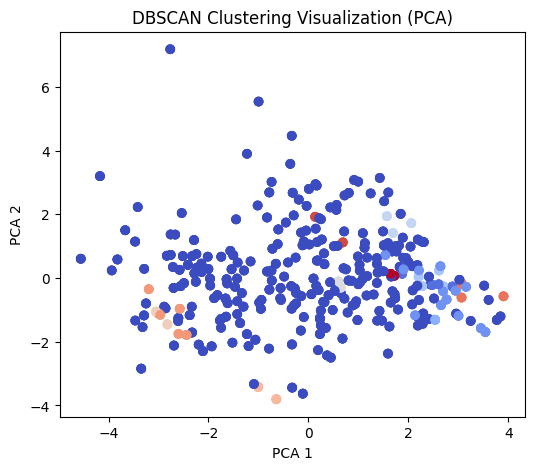

In [13]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis')
plt.title("KMeans Clustering Visualization (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan, cmap='coolwarm')
plt.title("DBSCAN Clustering Visualization (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Penjelasan Tahap Visualisasi Hasil Clustering

"""
Pada tahap ini dilakukan visualisasi hasil clustering menggunakan metode PCA (Principal Component Analysis)
untuk mereduksi dimensi data dari banyak fitur menjadi dua dimensi (2D).
Hal ini memudahkan dalam melihat pola pembagian cluster secara visual.

Setiap titik pada grafik merepresentasikan satu data pasien,
sementara warna yang berbeda menunjukkan hasil pembagian cluster dari masing-masing algoritma.

- Grafik pertama menampilkan hasil clustering menggunakan K-Means.
- Grafik kedua menampilkan hasil clustering menggunakan DBSCAN.

Dari visualisasi ini dapat diamati perbedaan pola pembentukan cluster antara kedua algoritma.
K-Means cenderung membentuk cluster yang lebih teratur dan berbentuk bulat,
sedangkan DBSCAN mampu mengenali area dengan kepadatan data yang berbeda.
"""


# 6. Approximate Nearest Neighbor (ANN) dengan Annoy

In [14]:


dim = X_scaled.shape[1]
ann = AnnoyIndex(dim, 'euclidean')

for i, v in enumerate(X_scaled):
    ann.add_item(i, v)
ann.build(10)

query_points = [10, 42, 73]

for q in query_points:
    neighbors, distances = ann.get_nns_by_item(q, 5, include_distances=True)
    print(f"\nQuery Point Index: {q}")
    print("Neighbor Index | Distance | Cluster (KMeans)")
    for n, d in zip(neighbors, distances):
        print(f"{n:<15} | {d:<8.4f} | {labels_kmeans[n]}")



Query Point Index: 10
Neighbor Index | Distance | Cluster (KMeans)
10              | 0.0000   | 1
401             | 0.0000   | 1
500             | 0.0000   | 1
648             | 0.0000   | 1
472             | 2.1946   | 1

Query Point Index: 42
Neighbor Index | Distance | Cluster (KMeans)
42              | 0.0000   | 0
670             | 0.0000   | 0
759             | 0.0000   | 0
924             | 0.0000   | 0
96              | 2.4744   | 0

Query Point Index: 73
Neighbor Index | Distance | Cluster (KMeans)
73              | 0.0000   | 2
318             | 0.0000   | 2
520             | 0.0000   | 2
556             | 0.0000   | 2
739             | 1.9615   | 2


# Penjelasan Tahap Analisis (Approximate Nearest Neighbor)

"""
Tahap ini menggunakan metode ANN (Approximate Nearest Neighbor) dengan algoritma Annoy
untuk mencari data pasien yang memiliki kemiripan paling dekat berdasarkan jarak Euclidean.

Setiap titik query akan dicari beberapa tetangga terdekatnya dari hasil clustering sebelumnya.
Jika mayoritas tetangga berada pada cluster yang sama,
maka dapat disimpulkan bahwa cluster tersebut bersifat stabil dan konsisten.

Analisis ini membantu memverifikasi apakah pembentukan cluster sudah cukup kuat
atau masih terdapat data yang tumpang tindih di antara cluster.
"""
